# Matplotlib Demonstration

### Import Required Libraries & Load Data

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.axes as ax
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [2]:
mouse_df = pd.read_csv("data/Mouse_metadata.csv")
study_df = pd.read_csv("data/Study_results.csv")

In [3]:
df = pd.merge(mouse_df, study_df, on="Mouse ID")
df.head(1)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0


### Create Groups for Analysis

In [4]:
regimen_group = df.groupby(["Drug Regimen"])
mouse_group = df.groupby(["Mouse ID"])
gender_group = df.groupby(["Sex"])
regi_gender_group = df.groupby(["Drug Regimen","Sex"])
regi_mouse_group = df.groupby(["Drug Regimen","Mouse ID"])

### Summary Statistics Table

In [5]:
tumor_summary = pd.DataFrame({
    "Tumor Mean":regimen_group['Tumor Volume (mm3)'].mean(),
    "Tumor Median":regimen_group['Tumor Volume (mm3)'].median(),
    "Tumor Variance":regimen_group['Tumor Volume (mm3)'].var(),
    "Tumor Stdev":regimen_group['Tumor Volume (mm3)'].std(),
    "Tumor SEM":regimen_group['Tumor Volume (mm3)'].sem(),
})
tumor_summary

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Stdev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


### Bar Plot - Number of Observations of each Drug Regimen

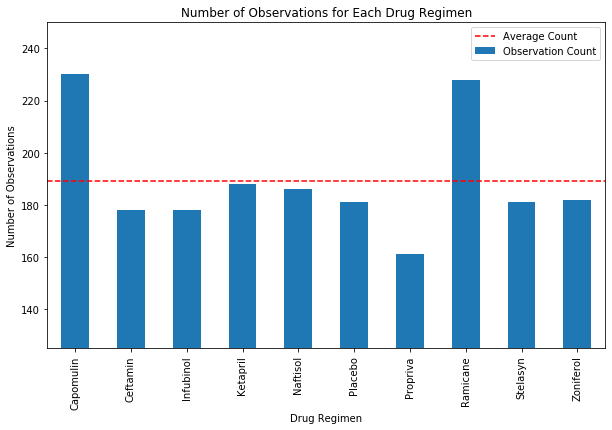

In [6]:
plt.figure(figsize=(10,6))
regimen_count = regimen_group['Mouse ID'].count()
regimen_count.plot(kind="bar", label='Observation Count')
plt.ylim(125, 250)
plt.axhline(y=regimen_group['Mouse ID'].count().mean(), color='red',linestyle='--', label='Average Count')
plt.ylabel("Number of Observations")
plt.title("Number of Observations for Each Drug Regimen")
plt.legend()
plt.show()

In [7]:
#  Lists
regimen_list = regimen_count.index.to_list()
best_regimens = ['Capomulin','Ceftamin','Infubinol','Ramicane']

### Pie Chart - Number of Male Observations vs Female Observations

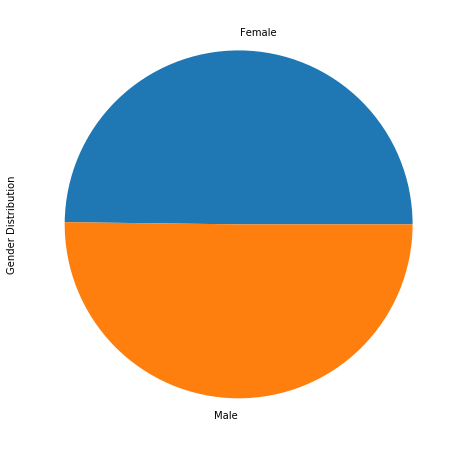

In [8]:
gender_lists = gender_group['Mouse ID'].unique()
gender_map = gender_lists.map(len)
female_distribution = round(gender_map[0]/(gender_map[0]+gender_map[1]),4)*100
male_distribution = round(gender_map[1]/(gender_map[0]+gender_map[1]),4)*100

plt.figure(figsize=(8,8))
plt.pie(gender_map, labels=['Female','Male'])
plt.ylabel('Gender Distribution')
plt.show()

### Final Tumor Volumes for Most Promising Regimes

In [9]:
regi_mice = regi_mouse_group.last()
best_regis = [b for b in best_regimens]
regi_output = [regi_mice['Tumor Volume (mm3)'][best_regis]]
regi_output_df = pd.DataFrame(regi_output).transpose().reset_index()
regi_output_df[23:27]

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
23,Capomulin,x401,28.484033
24,Capomulin,y793,31.896238
25,Ceftamin,a275,62.999356
26,Ceftamin,b447,45.000000


### Determine Inter-Quartile Ranges for Box Plots

In [10]:
tumor_vols = [regi_output_df.loc[regi_output_df['Drug Regimen'] == best_regimens[i], 'Tumor Volume (mm3)'] for i in range(4)]

for i in range(4):
    quartiles = tumor_vols[i].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = round(upperq-lowerq,2)
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"The IQR for Item {i+1} is {iqr}.")
    if (lower_bound < tumor_vols[i].min()) & (upper_bound > tumor_vols[i].max()):
        continue
    else:
        print(f"-->THERE IS AT LEAST ONE OUTLIER FOR ITEM {i+1}.")

The IQR for Item 1 is 7.78.
The IQR for Item 2 is 15.58.
The IQR for Item 3 is 11.48.
-->THERE IS AT LEAST ONE OUTLIER FOR ITEM 3.
The IQR for Item 4 is 9.1.


### Construct a Box Plot for Tumor Volumes of Best Regimes

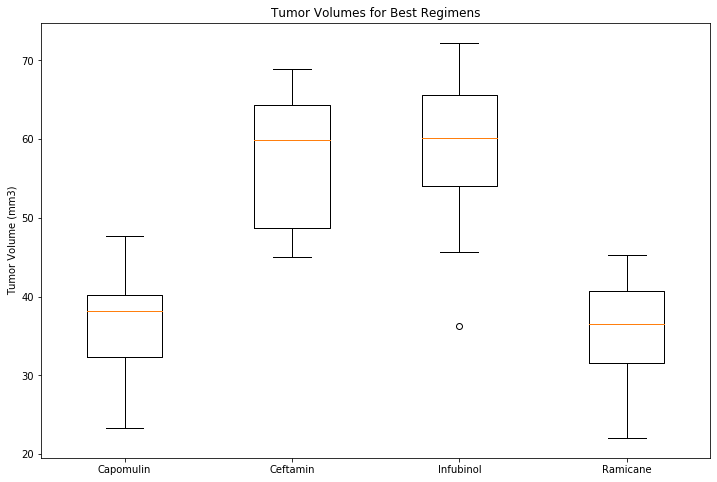

In [11]:
fig1, ax1 = plt.subplots(figsize=(12,8))
ax1.set_title('Tumor Volumes for Best Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vols)
plt.setp(ax1, xticks=[1, 2, 3, 4], xticklabels=best_regimens)
plt.show()

### Construct a Line Plot for One Mouse (Capomulin)

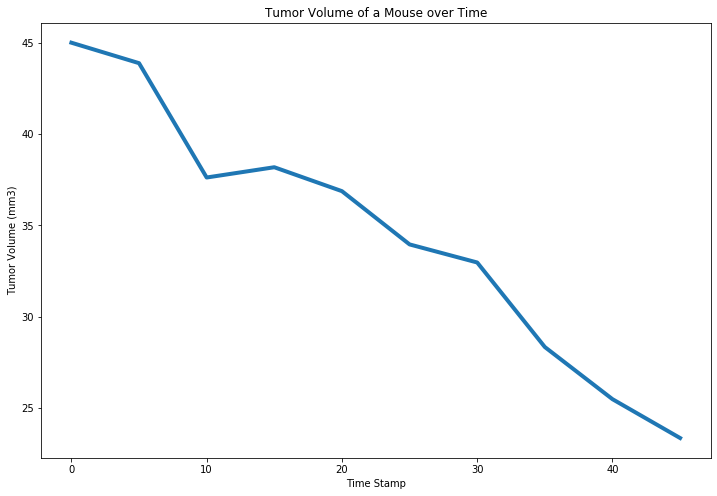

In [12]:
mouse_volume = (df['Tumor Volume (mm3)'][10:20].to_list())
mouse_time = (df['Timepoint'][10:20].to_list())

plt.figure(figsize=(12,8))
plt.plot(mouse_time, mouse_volume, linewidth=4)
plt.xlabel("Time Stamp")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Volume of a Mouse over Time")
plt.show()

### Scatter Plot of Mouse Weight vs Tumor Volume (Capomulin)

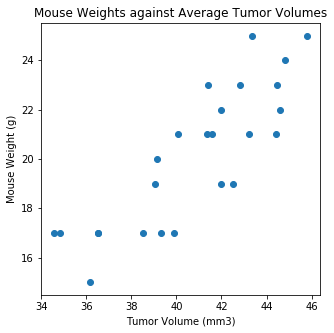

In [13]:
mouse_sub_list = df[df['Drug Regimen'] == 'Capomulin']
mouse_sub_list_id = mouse_sub_list['Mouse ID'].unique()
mouse_sub_list_avg_vol = pd.Series([mouse_group.get_group(m)['Tumor Volume (mm3)'].mean() for m in mouse_sub_list_id])
mouse_sub_list_weight = pd.Series([mouse_group.get_group(m)['Weight (g)'].sum()/mouse_group.get_group(m)['Weight (g)'].count() for m in mouse_sub_list_id])

plt.figure(figsize=(5,5))
plt.scatter(mouse_sub_list_avg_vol, mouse_sub_list_weight)
plt.xlabel("Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.title("Mouse Weights against Average Tumor Volumes")
plt.show()

### Same Scatter Plot with Linear Equation through Plot

The R-Value between Mouse Weights and Tumor Volumes is 0.84 for Capomulin Mice.


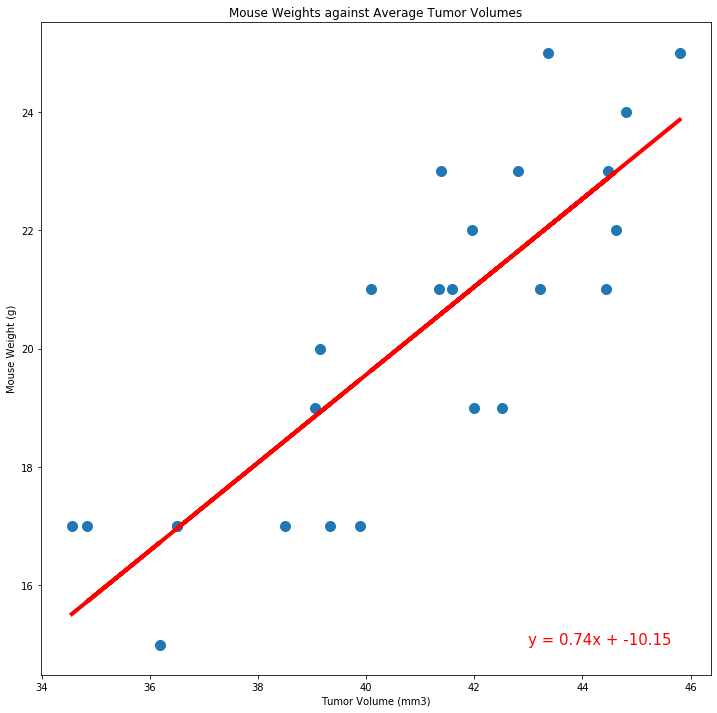

In [14]:
x_values = mouse_sub_list_avg_vol
y_values = mouse_sub_list_weight
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

slope, intercept, r_value, p_value, std_err = sp.linregress(x_values, y_values)
print(f"The R-Value between Mouse Weights and Tumor Volumes is {round(r_value,2)} for Capomulin Mice.")

plt.figure(figsize=(12,12))
plt.scatter(x_values,y_values,s=100)
plt.plot(x_values,regress_values,"r-",linewidth=4)
plt.annotate(line_eq,(43,15),fontsize=15,color="red")
plt.xlabel('Tumor Volume (mm3)')
plt.ylabel('Mouse Weight (g)')
plt.title("Mouse Weights against Average Tumor Volumes")
plt.show()